In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Gold_data/

'gold (2).csv'	 gold.csv.gsheet


In [ ]:
import pandas as pd

# Load CSV
file_path = '/content/drive/MyDrive/Gold_data/gold (2).csv'
df = pd.read_csv(file_path)

# Show first few rows
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,15-12-2011,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,16-12-2011,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,19-12-2011,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,20-12-2011,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,21-12-2011,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)


/tmp/ipython-input-278-3937327433.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Drop redundant or leaking columns (if predicting gold 'Close')
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close'])  # Keep 'Close' as target


In [ ]:
# Check for nulls or duplicates
print("Missing values:\n", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())


Missing values:
 0
Duplicates: 0


In [ ]:
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_MA3'] = df['Close'].rolling(window=3).mean()
df = df.dropna()  # drop rows with NaN values created by shift


In [ ]:
# Define X (features) and y (target)
X = df.drop(columns=['Close'])
y = df['Close']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Time-based split: no shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Use original features for tree models (scaling not needed)


RandomForestRegressor(random_state=42)

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X, y, name="Model"):
    preds = model.predict(X)
    print(f"\n{name} Evaluation:")
    print("MAE:", mean_absolute_error(y, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y, preds)))
    print("R² Score:", r2_score(y, preds))

# Linear Regression
evaluate_model(lr_model, X_test_scaled, y_test, "Linear Regression")

# Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# XGBoost
evaluate_model(xgb_model, X_test, y_test, "XGBoost")



Linear Regression Evaluation:
MAE: 1.149674670709511e-13
RMSE: 1.2405546735529068e-13
R² Score: 1.0

Random Forest Evaluation:
MAE: 0.4466001077325557
RMSE: 0.5931009789196615
R² Score: 0.9835963064164334

XGBoost Evaluation:
MAE: 0.6528769102769011
RMSE: 0.829102080345824
R² Score: 0.9679446608437938


In [ ]:
importances = rf_model.feature_importances_
features = X.columns

# Top 20 features
top_idx = np.argsort(importances)[::-1][:20]
top_features = features[top_idx]

# Filter dataset
X_top = X[top_features]


In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
tscv = TimeSeriesSplit(n_splits=5)

scores = cross_val_score(lr_model, X_top, y, cv=tscv, scoring='r2')
print("Time Series Cross-Validated R2:", scores.mean())


Time Series Cross-Validated R2: 1.0


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
lr_preds = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Linear Regression Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("R² Score:", r2_score(y_test, lr_preds))


Linear Regression Model Evaluation:
MAE: 3.426473422309279e-08
RMSE: 4.317684565342159e-08
R² Score: 0.9999999999999999


In [ ]:
# plot for comparing the linear regression model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


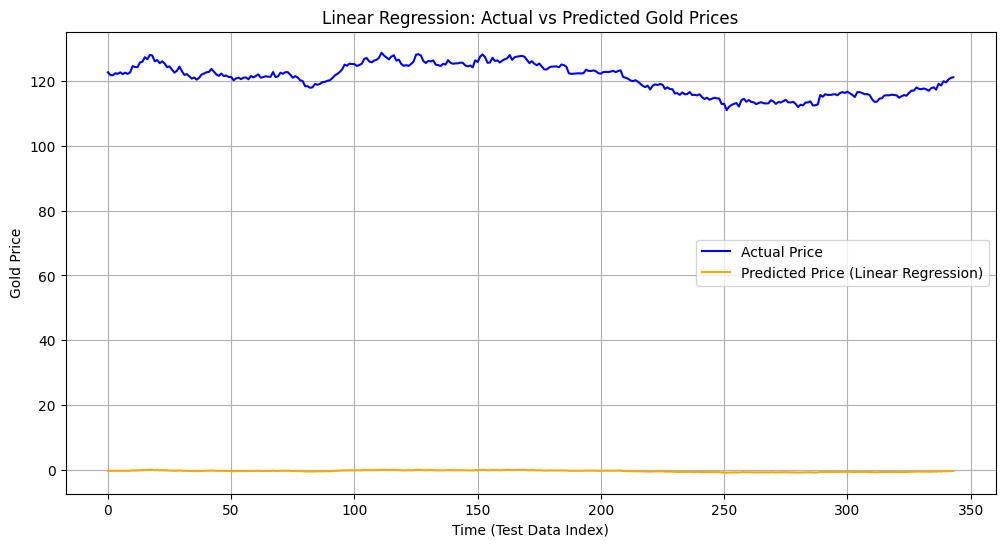

In [ ]:
import matplotlib.pyplot as plt

# Predict with linear regression
lr_preds = lr_model.predict(X_test_scaled)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(lr_preds, label='Predicted Price (Linear Regression)', color='orange')
plt.title('Linear Regression: Actual vs Predicted Gold Prices')
plt.xlabel('Time (Test Data Index)')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#plot for random forest

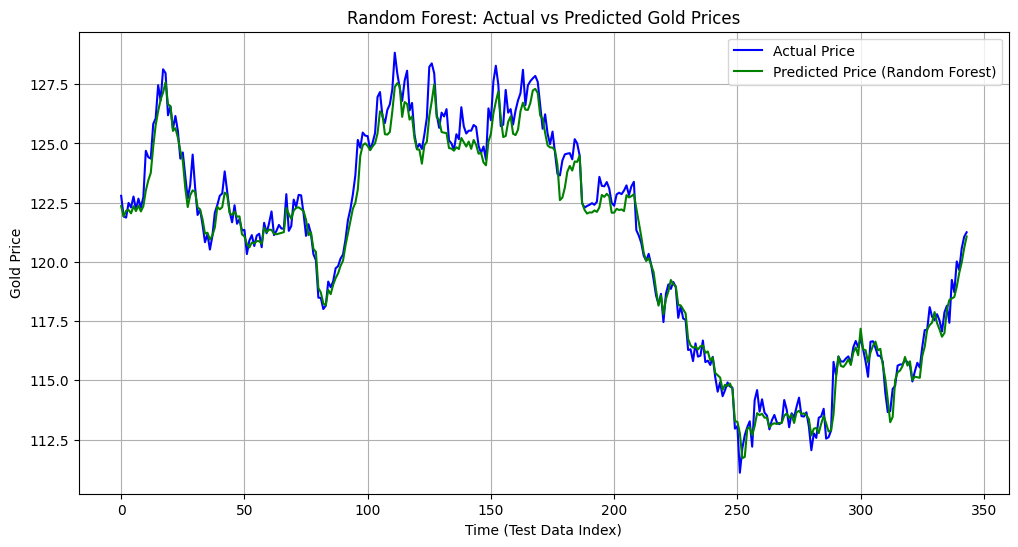

In [ ]:
rf_preds = rf_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(rf_preds, label='Predicted Price (Random Forest)', color='green')
plt.title('Random Forest: Actual vs Predicted Gold Prices')
plt.xlabel('Time (Test Data Index)')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## knowing the most useful features to work on the limited the feature and gain good accuracy

In [ ]:
importances = rf_model.feature_importances_
features = X.columns

# Show top 20
top_idx = importances.argsort()[::-1][:20]
top_features = features[top_idx]

# Print top features
for name, score in zip(top_features, importances[top_idx]):
    print(f"{name}: {score:.4f}")


Close_MA3: 0.3544
Close_Lag1: 0.2930
GDX_Close: 0.0849
GDX_Adj Close: 0.0765
GDX_High: 0.0509
Close_Lag2: 0.0427
DJ_open: 0.0173
SP_open: 0.0173
GDX_Open: 0.0172
GDX_Low: 0.0171
DJ_low: 0.0086
SP_low: 0.0085
DJ_high: 0.0085
EG_Ajclose: 0.0003
SF_Price: 0.0003
EG_open: 0.0002
EG_low: 0.0002
EG_close: 0.0002
SF_High: 0.0001
Volume: 0.0001


In [ ]:
# using only the feature importance listed top features helping gold price to predict

In [ ]:
top_features = [
    'GDX_Adj Close', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Open',
    'SP_Ajclose', 'SP_high', 'DJ_open', 'DJ_high', 'SF_Price'
]

X = df[top_features]
y = df['Close']


In [ ]:
# Split, scale (if needed), and retrain
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict
preds = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))  # Fix here
print("R² Score:", r2_score(y_test, preds))


MAE: 3.2858416926162777
RMSE: 4.020242537964696
R² Score: 0.24631672919630343


In [ ]:
# trying with 20 features

In [ ]:
import numpy as np

# Get importances from a trained RandomForest model
importances = model.feature_importances_   # or rf_model.feature_importances_
features = X.columns  # All feature names

# Sort and get top 20 indices
top_idx = np.argsort(importances)[::-1][:20]

# Fix the selection line:
top_features_20 = list(features[top_idx])  # ✅ Convert to list before indexing


In [ ]:
X_top20 = df[top_features_20]
y_top20 = df['Close']


In [ ]:
X_top20 = df[top_features_20]
y_top20 = df['Close']

# Train-test split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_top20, y_top20, test_size=0.2, shuffle=False)

# Train model
model_20 = RandomForestRegressor()
model_20.fit(X_train_20, y_train_20)

# Predict
preds_20 = model_20.predict(X_test_20)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test_20, preds_20))
print("RMSE:", np.sqrt(mean_squared_error(y_test_20, preds_20)))
print("R² Score:", r2_score(y_test_20, preds_20))


MAE: 3.4284709409011644
RMSE: 4.158022998039078
R² Score: 0.19377151043753915


In [ ]:
## lag feature is working better then top 20 features

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_preds = model_xgb.predict(X_test)


In [ ]:
#Xgboost prediction plot

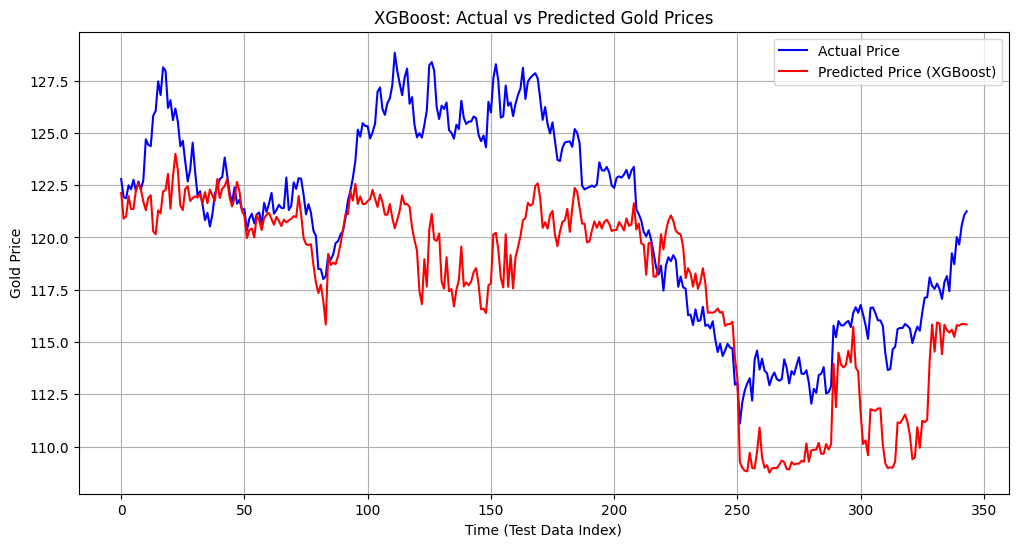

In [ ]:


# Now plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(xgb_preds, label='Predicted Price (XGBoost)', color='red')
plt.title('XGBoost: Actual vs Predicted Gold Prices')
plt.xlabel('Time (Test Data Index)')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train, y_train)

xgb_preds = model_xgb.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("XGBoost Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, xgb_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("R² Score:", r2_score(y_test, xgb_preds))


XGBoost Model Evaluation:
MAE: 3.3538837405778756
RMSE: 4.119218074321542
R² Score: 0.2087496131568548


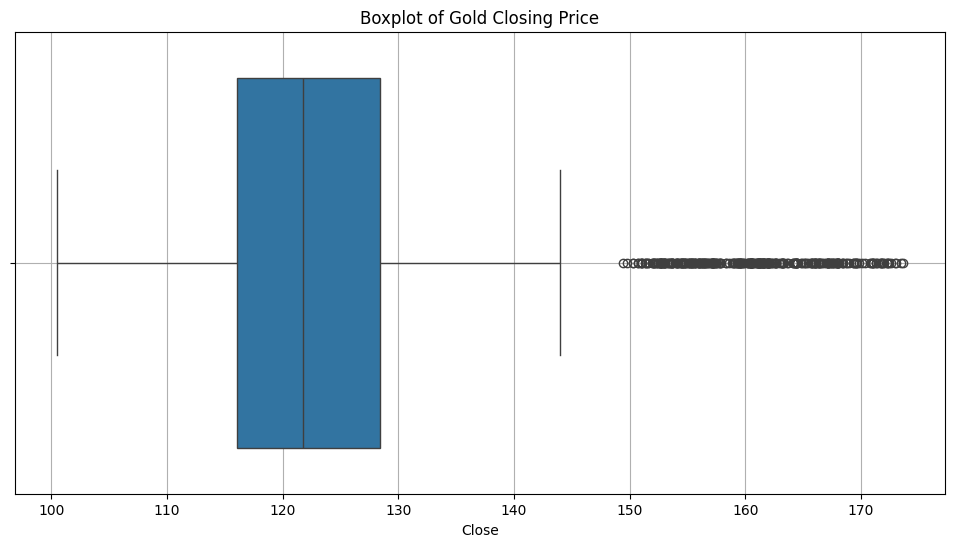

In [ ]:
# checking for outliers through plot if there are.. they can influence the prediction

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Close'])
plt.title("Boxplot of Gold Closing Price")
plt.grid(True)
plt.show()


In [ ]:
# through boxplot we can see outliers in the close column

#remover outliers

Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe
df_cleaned = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]

print("Before cleaning:", df.shape[0], "rows")
print("After cleaning:", df_cleaned.shape[0], "rows")


Before cleaning: 1716 rows
After cleaning: 1393 rows


In [ ]:
# taking the first backup

backup_one = df.copy()


In [ ]:
# removing outliers from all the coloumn

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Filter out the outliers
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean


In [ ]:
# Get only numeric columns (skip Date)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers from all numeric columns
df_cleaned_all = remove_outliers_iqr(df, numeric_cols)

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned_all.shape)


Original shape: (1716, 79)
Cleaned shape: (721, 79)


In [ ]:
feature_columns = df_cleaned_all.drop(columns=['Close']).columns.tolist()


In [ ]:
X = df_cleaned_all[feature_columns]
y = df_cleaned_all['Close']


In [ ]:
### after cleaning the dataset through removing the outliers from all the columns

X = df_cleaned_all[feature_columns]
y = df_cleaned_all['Close']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


#score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

preds = model.predict(X_test)

print("Cleaned Data Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
print("R² Score:", r2_score(y_test, preds))


Cleaned Data Model Evaluation:
MAE: 0.46613439558620556
RMSE: 0.6088880048778584
R² Score: 0.9596602254958332


In [ ]:
## trying now on the complete data as taking all column as features after removing the complete outliers

X = df_cleaned_all.drop(columns=['Close'])  # all features except target
y = df_cleaned_all['Close']                # target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

preds = model.predict(X_test)

print("Model Using All Features:")
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
print("R² Score:", r2_score(y_test, preds))



Model Using All Features:
MAE: 0.46613439558620556
RMSE: 0.6088880048778584
R² Score: 0.9596602254958332


In [ ]:
#barplot for both the prediction
# for comparing visually

# 1. Select features
feature_columns = [
    'Close_Lag1', 'Close_Lag2', 'Close_MA3',
    'GDX_Adj Close', 'GDX_High', 'GDX_Low', 'SP_Ajclose', 'SP_high'
]

X_selected = df_cleaned_all[feature_columns]
y = df_cleaned_all['Close']

# 2. Split (no shuffle for time series)
from sklearn.model_selection import train_test_split
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=False)

# 3. Train model again (even if you did earlier)
from sklearn.ensemble import RandomForestRegressor
model_selected = RandomForestRegressor(random_state=42)
model_selected.fit(X_train_selected, y_train)

# 4. Predict
preds_selected = model_selected.predict(X_test_selected)

#for the Full Feature Predictions comparison

X_all = df_cleaned_all.drop(columns=['Close'])
X_train_all, X_test_all, _, _ = train_test_split(X_all, y, test_size=0.2, shuffle=False)

model_all = RandomForestRegressor(random_state=42)
model_all.fit(X_train_all, y_train)

preds_all = model_all.predict(X_test_all)




In [ ]:
#plot

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Price', color='black')
plt.plot(preds_selected, label='Predicted (8 Features)', color='green')
plt.plot(preds_all, label='Predicted (All Features)', color='red')
plt.title("Gold Price Prediction: Selected vs All Features")
plt.xlabel("Time (Test Index)")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#after cleaning all outlier backup as backup_outlier

backup_outlier = df_cleaned_all.copy()



In [ ]:
# trained data (8 features) backup
import joblib

# Save the 8-feature model
joblib.dump(model_selected, "gold_model_selected.pkl")


In [ ]:
#trained data (all features after removing the outliers) backup

joblib.dump(model_all, "gold_model_all.pkl")


In [ ]:
#final zip

#saving all the feature list to json file

import json

feature_columns = [
    'Close_Lag1', 'Close_Lag2', 'Close_MA3',
    'GDX_Adj Close', 'GDX_High', 'GDX_Low', 'SP_Ajclose', 'SP_high'
]

with open("selected_features.json", "w") as f:
    json.dump(feature_columns, f)


!zip gold_model_package.zip gold_model_selected.pkl selected_features.json


In [ ]:
# !zip gold_model_package.zip gold_model_selected.pkl selected_features.json

# from google.colab import files

# files.download("gold_model_package.zip")
